In [220]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Indicators

In [246]:
# first of all we deserialize our dataframe
df = pd.read_csv("../dataset/customer_supermarket.csv", sep="\t", index_col=0, parse_dates=["BasketDate"], decimal=",")
print(df.head())
print(df.info())

  BasketID          BasketDate  Sale CustomerID CustomerCountry  ProdID  \
0   536365 2010-01-12 08:26:00  2.55    17850.0  United Kingdom  85123A   
1   536365 2010-01-12 08:26:00  3.39    17850.0  United Kingdom   71053   
2   536365 2010-01-12 08:26:00  2.75    17850.0  United Kingdom  84406B   
3   536365 2010-01-12 08:26:00  3.39    17850.0  United Kingdom  84029G   
4   536365 2010-01-12 08:26:00  3.39    17850.0  United Kingdom  84029E   

                             ProdDescr  Qta  
0   WHITE HANGING HEART T-LIGHT HOLDER    6  
1                  WHITE METAL LANTERN    6  
2       CREAM CUPID HEARTS COAT HANGER    8  
3  KNITTED UNION FLAG HOT WATER BOTTLE    6  
4       RED WOOLLY HOTTIE WHITE HEART.    6  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 

# I - indicator
the total number of items purchased by a customer during the period of
observation.

In [222]:
df_i = df.groupby("CustomerID").sum().reset_index()
df_i = df_I[["CustomerID", "Qta"]]
df_i

,CustomerID,Qta
0,12346,0
1,12347,2458
2,12348,2341
3,12349,631
4,12350,197
...,...,...
4367,18280,45
4368,18281,54
4369,18282,98
4370,18283,1357


In [223]:
#!! look at this, it might be an outlier
print(df[df.CustomerID == 12346])

Empty DataFrame
Columns: [BasketID, BasketDate, Sale, CustomerID, CustomerCountry, ProdID, ProdDescr, Qta]
Index: []


# Iu - indicator
the number of distinct items bought by a customer in the period of
observation.

In [224]:
df_iu = df.groupby('CustomerID')['ProdID'].nunique().reset_index()
df_iu

,CustomerID,ProdID
0,12346.0,1
1,12347.0,103
2,12348.0,22
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,12
4370,18283.0,263


# Imax - indicator
the maximum number of items purchased by a customer during a
shopping session

In [225]:
df_imax = df.groupby(["CustomerID", "BasketID"]).Qta.sum()
df_imax = df_imax.groupby(level=0).head(1).reset_index()

#df_imax = df_imax.max(level=0)

df_imax

,CustomerID,BasketID,Qta
0,12346.0,541431,74215
1,12347.0,537626,319
2,12348.0,539318,1254
3,12349.0,577609,631
4,12350.0,543037,197
...,...,...,...
4367,18280.0,545712,45
4368,18281.0,556464,54
4369,18282.0,562525,75
4370,18283.0,540350,61


# E - indicator
the Shannon entropy on the purchasing behaviour of the customer

In [226]:
df_temp = df.groupby(["CustomerID", "BasketID"]).Qta.sum().reset_index()
values = df_temp["Qta"]
df_temp['Entropy'] = -(values*np.log(values))
df_entropy = df_temp.groupby('CustomerID')['Entropy'].sum().reset_index()
# to remove nan values caused by logs
df_entropy['Entropy'] = df_entropy['Entropy'].fillna(0)


df_entropy

/Users/tommasocolella/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning:

invalid value encountered in log



,CustomerID,Entropy
0,12346.0,-832300.560951
1,12347.0,-14642.853340
2,12348.0,-15464.124169
3,12349.0,-4068.249999
4,12350.0,-1040.791135
...,...,...
4367,18280.0,-171.299812
4368,18281.0,-215.405139
4369,18282.0,-417.113335
4370,18283.0,-6585.398309


### Putting together all indicators

In [227]:
frames = [df_entropy, df_imax.Qta, df_iu.ProdID, df_i.Qta]
indicators = pd.concat(frames, join='outer', axis=1)
indicators.columns = ("CustomerID", "Entropy", "imax", "iu", "i")
print(indicators.head())

indicators.to_csv("../dataset/indicators.csv")

  CustomerID        Entropy   imax   iu     i
0    12346.0 -832300.560951  74215    1     0
1    12347.0  -14642.853340    319  103  2458
2    12348.0  -15464.124169   1254   22  2341
3    12349.0   -4068.249999    631   73   631
4    12350.0   -1040.791135    197   17   197


# Additional indicators

### Sales per country
(is this even an indicator?)

In [228]:
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
541905,581587,2011-09-12 12:50:00,2.10,12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
541906,581587,2011-09-12 12:50:00,4.15,12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
541907,581587,2011-09-12 12:50:00,4.15,12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
541908,581587,2011-09-12 12:50:00,4.95,12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [229]:
df_sales_per_country = df.groupby(["CustomerCountry"])["Sale"].sum().reset_index()
print(df_sales_per_country)

         CustomerCountry          Sale
0              Australia  4.054750e+03
1                Austria  1.701520e+03
2                Bahrain  8.657000e+01
3                Belgium  7.540130e+03
4                 Brazil  1.426000e+02
5                 Canada  9.105800e+02
6        Channel Islands  3.738550e+03
7                 Cyprus  3.920070e+03
8         Czech Republic  8.815000e+01
9                Denmark  1.266950e+03
10                  EIRE  4.028078e+04
11    European Community  2.940500e+02
12               Finland  3.786850e+03
13                France  4.296034e+04
14               Germany  3.766600e+04
15                Greece  7.132900e+02
16             Hong Kong  8.260080e+03
17               Iceland  4.812100e+02
18                Israel  9.839300e+02
19                 Italy  3.879390e+03
20                 Japan  8.148600e+02
21               Lebanon  2.424400e+02
22             Lithuania  9.944000e+01
23                 Malta  6.660100e+02
24           Netherlands 

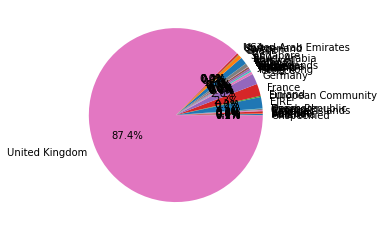

<Figure size 1440x1440 with 0 Axes>

In [261]:
# the pie plot is horrible because of england, that probably has some outliers
#explode=np.zeros(len(df_sales_per_country.CustomerCountry))

plt.pie(df_sales_per_country.Sale, labels=df_sales_per_country.CustomerCountry, autopct='%1.1f%%')
plt.show()

### Most bought items

In [233]:
cols_dropped = [2, 3, 6]
df_most_bought = df.groupby(["ProdID", "ProdDescr"]).sum().reset_index()
#df_most_bought = df_most_bought.drop(df_most_bought.columns[cols_dropped], axis=1)
df_most_bought = df_most_bought.sort_values(by="Qta", ascending=False)
#df_most_bought = df_most_bought.groupby(level=0).head(1).reset_index()
df_most_bought 

#print(df[df.ProdDescr == "Discount"])

,ProdID,ProdDescr,Sale,Qta
3334,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,156.76,53503
3857,85099B,JUMBO BAG RED RETROSPOT,4363.06,46287
3639,84879,ASSORTED COLOUR BIRD ORNAMENT,2506.90,36115
483,21212,PACK OF 72 RETROSPOT CAKE CASES,811.30,34657
3877,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6550.21,34583
...,...,...,...,...
30,16008,check,0.00,-1510
3250,79164,damages/credits from ASOS.,0.00,-1512
2142,23059,Thrown away-rusty,0.00,-2376
1641,22617,"mouldy, thrown away.",0.00,-2600


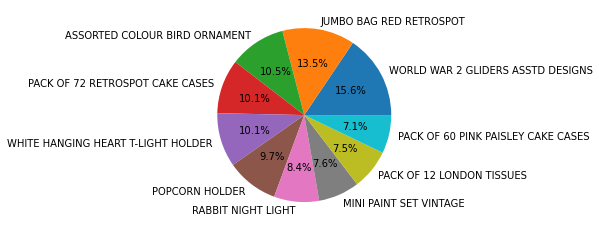

In [234]:
plt.pie(df_most_bought[:10].Qta, labels=df_most_bought[:10].ProdDescr, autopct='%1.1f%%')
plt.savefig("../output/most_bought_item_piechart.png")
plt.show()

### Most bought item per country


In [243]:
#cols_dropped = [3, 4, 7]
df_mb_country = df.groupby(["ProdID", "ProdDescr", "CustomerCountry"]).sum().reset_index()
df_mb_country = df_mb_country.drop(["Sale"], axis = 1)

df_mb_country = df_mb_country[df_mb_country.groupby(["CustomerCountry"])["Qta"].transform("max") == df_mb_country["Qta"]].reset_index()

#df_mb_country = df_mb_country.groupby(["CustomerCountry"]).agg({"Qta" : "max"}).reset_index()
#print(df_mb_country.CustomerCountry.unique())


print(df_mb_country)


    index  ProdID                            ProdDescr       CustomerCountry  \
0     139   16008  SMALL FOLDING SCISSOR(POINTED EDGE)                Norway   
1     688   20719               WOODLAND CHARLOTTE BAG                Israel   
2    2066   21212      PACK OF 72 RETROSPOT CAKE CASES               Belgium   
3    2068   21212      PACK OF 72 RETROSPOT CAKE CASES                  EIRE   
4    2199   21232       STRAWBERRY CERAMIC TRINKET BOX                Poland   
..    ...     ...                                  ...                   ...   
58  18522   84929   ASSTD FRUIT+FLOWERS FRIDGE MAGNETS               Lebanon   
59  18637  84971S            SMALL HEART FLOWERS HOOK                 Brazil   
60  18814  84997D      CHILDRENS CUTLERY POLKADOT PINK               Finland   
61  18824  84997D      CHILDRENS CUTLERY POLKADOT PINK                 Spain   
62  19544   85215       ASSORTED CHEESE FRIDGE MAGNETS  United Arab Emirates   

     Qta  
0    576  
1    120  
2    4

### Linear Graphs

In [247]:
# start and end datetimes
print(df.BasketDate.min(), df.BasketDate.max())

2010-01-12 08:26:00 2011-12-10 17:19:00


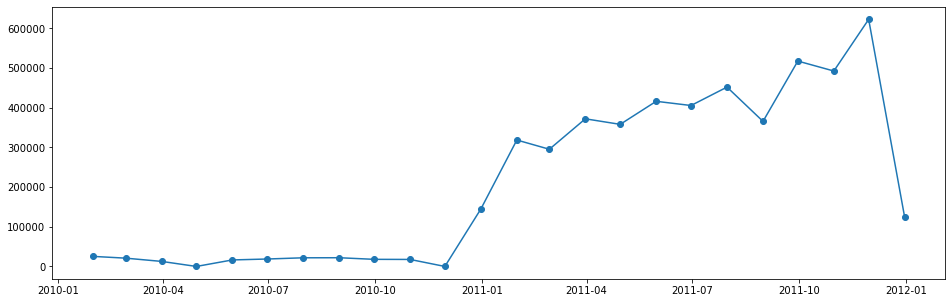

In [257]:
weekly = df.set_index("BasketDate").copy()
weekly = weekly.groupby(pd.Grouper(freq='M'))["Qta"].sum()

#print(weekly)

plt.figure(figsize=(16,5))
plt.plot(weekly.index, weekly, color='tab:blue', marker="o")